In [60]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
iris = load_iris() # 加载数据集

In [62]:
# 查看数据集描述
print("数据集描述：")
print(iris.DESCR)

数据集描述：
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 class

In [63]:
# 将数据集转换为DataFrame格式
import pandas as pd

# 创建DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 添加目标列
df['target'] = iris.target
# 方法一：使用pandas的map方法
# map方法接收一个字典作为参数,字典的键是原始值,值是要映射的新值
# 这里将target列中的0,1,2分别映射为'setosa','versicolor','virginica'
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 方法二：使用列表推导式
# iris.target_names是一个包含类别名称的列表['setosa','versicolor','virginica']
# iris.target包含0,1,2这些索引值
# 列表推导式遍历target中的每个值i,通过iris.target_names[i]获取对应的类别名称
#iris_df['target_names'] = [iris.target_names[i] for i in iris.target]

# 两种方法的区别:
# 1. map方法更直观,通过字典明确指定映射关系
# 2. 列表推导式通过索引访问,依赖iris.target_names列表的顺序
# 3. map方法的性能通常更好,因为使用了哈希表查找
# 4. 两种方法最终得到的结果是完全一样的
# 显示前几行数据
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


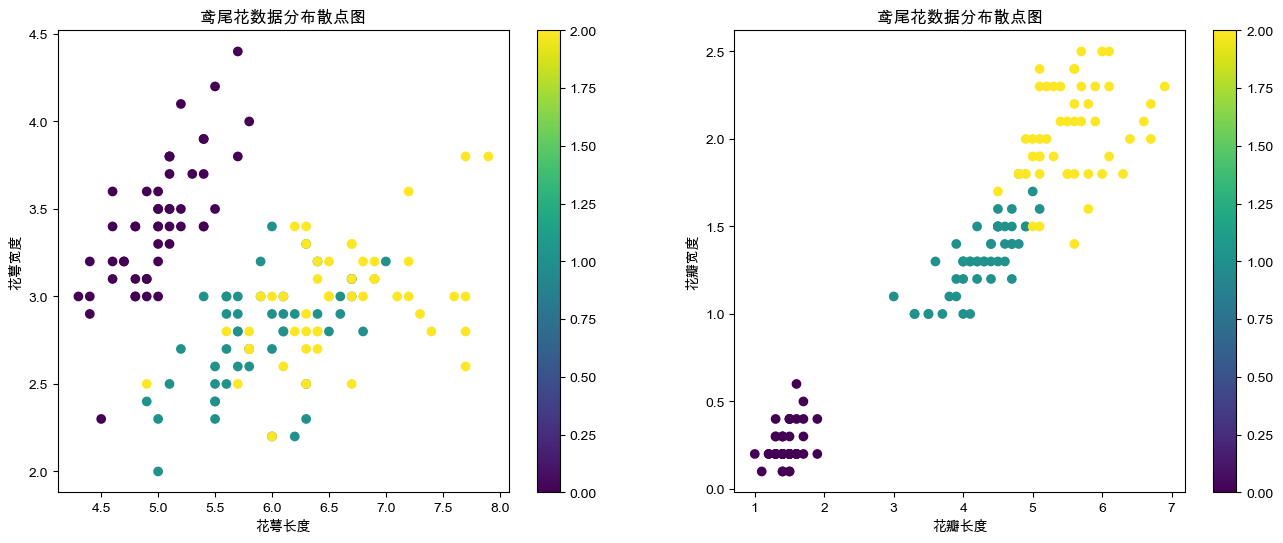

In [64]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # macOS系统使用
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建散点图
plt.figure(figsize=(16, 6))
# 创建散点图，使用sepal length作为x轴，sepal width作为y轴，根据target进行颜色映射
plt.subplot(1,2,1)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'], cmap='viridis')
plt.colorbar()

# 设置标题和轴标签
plt.title('鸢尾花数据分布散点图')
plt.xlabel('花萼长度')
plt.ylabel('花萼宽度')

# subplot(1,2,2)表示将图像分为1行2列,当前绘制第2个子图
# subplots()是一次性创建多个子图,返回figure对象和axes数组
plt.subplot(1,2,2)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['target'], cmap='viridis')
plt.colorbar()

# 设置标题和轴标签
plt.title('鸢尾花数据分布散点图')
plt.xlabel('花瓣长度')
plt.ylabel('花瓣宽度')

plt.show()




In [65]:
from sklearn.datasets import fetch_20newsgroups # 20newsgroups数据集
# 设置数据存储路径
data_home = './data'

# 加载20类新闻数据集，random_state=42，表示随机种子，保证每次运行结果相同,可以随意设置
newsgroups = fetch_20newsgroups(data_home=data_home, subset='all', shuffle=True, random_state=42)

# 显示数据集基本信息
print("\n20类新闻数据集基本信息：")
print(f"样本数量: {len(newsgroups.data)}")
print(f"目标类别数量: {len(newsgroups.target_names)}")
print(f"目标类别: {newsgroups.target_names}")

# 显示前五个样本的类别
print("前五个样本的类别:", newsgroups.target[:5])
print("前五个样本的类别名称:", [newsgroups.target_names[i] for i in newsgroups.target[:5]])
# 打印target的最大值和最小值
# target是一个数组,存储了每个新闻样本对应的类别索引(0-19)
# 比如target[0]=7表示第一个新闻样本属于第8个类别(索引从0开始)

print(f"target的最大值: {max(newsgroups.target)}")
print(f"target的最小值: {min(newsgroups.target)}")

print("前两个样本的文本内容:")
for i in range(2):
    print(f"样本 {i+1}:\n{newsgroups.data[i]}\n")


20类新闻数据集基本信息：
样本数量: 18846
目标类别数量: 20
目标类别: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
前五个样本的类别: [10  3 17  3  4]
前五个样本的类别名称: ['rec.sport.hockey', 'comp.sys.ibm.pc.hardware', 'talk.politics.mideast', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
target的最大值: 19
target的最小值: 0
前两个样本的文本内容:
样本 1:
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit

In [66]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 加载加州房价数据集
housing = fetch_california_housing()

# 转换为DataFrame格式便于查看
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target

# 显示数据集基本信息
print("加利福尼亚房价数据集基本信息：")
print(f"样本数量: {housing.data.shape[0]}")
print(f"特征数量: {housing.data.shape[1]}")
print(f"特征名称: {housing.feature_names}")

# 显示数据集基本信息
print("数据集形状:", housing_df.shape)
#print("\n特征说明:\n", housing.DESCR)
# 显示数据集前五行
housing_df.head()




加利福尼亚房价数据集基本信息：
样本数量: 20640
特征数量: 8
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
数据集形状: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [67]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# 加载加利福尼亚房价数据集
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 按照9:1的比例划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 打印数据集大小
print("训练集特征形状:", X_train.shape)
print("测试集特征形状:", X_test.shape)
print("训练集标签形状:", y_train.shape)
print("测试集标签形状:", y_test.shape)



训练集特征形状: (18576, 8)
测试集特征形状: (2064, 8)
训练集标签形状: (18576,)
测试集标签形状: (2064,)


In [68]:
data = pd.read_csv("./data/FBlocation/train.csv")

print(data.head(10))    
print(data.shape)
print(data.info()) # 查看数据信息

   row_id       x       y  accuracy    time    place_id
0       0  0.7941  9.0809        54  470702  8523065625
1       1  5.9567  4.7968        13  186555  1757726713
2       2  8.3078  7.0407        74  322648  1137537235
3       3  7.3665  2.5165        65  704587  6567393236
4       4  4.0961  1.1307        31  472130  7440663949
5       5  3.8099  1.9586        75  178065  6289802927
6       6  6.3336  4.3720        13  666829  9931249544
7       7  5.7409  6.7697        85  369002  5662813655
8       8  4.3114  6.9410         3  166384  8471780938
9       9  6.3414  0.0758        65  400060  1253803156
(29118021, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29118021 entries, 0 to 29118020
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   row_id    int64  
 1   x         float64
 2   y         float64
 3   accuracy  int64  
 4   time      int64  
 5   place_id  int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 GB
None


In [69]:
data = data.query("x > 1.0 &  x < 1.25 & y > 2.5 & y < 2.75")
print(data.shape)

(17710, 6)


In [70]:
data.describe()

,row_id,x,y,accuracy,time,place_id
count,1.771000e+04,17710.000000,17710.000000,17710.000000,17710.000000,1.771000e+04
mean,1.450569e+07,1.122538,2.632309,82.482101,397551.263128,5.129895e+09
std,8.353805e+06,0.077086,0.070144,113.613227,234601.097883,2.357399e+09
min,6.000000e+02,1.000100,2.500100,1.000000,119.000000,1.012024e+09
25%,7.327816e+06,1.049200,2.573800,25.000000,174069.750000,3.312464e+09
50%,1.443071e+07,1.123300,2.642300,62.000000,403387.500000,5.261906e+09
75%,2.163463e+07,1.190500,2.687800,75.000000,602111.750000,6.766325e+09
max,2.911215e+07,1.249900,2.749900,1004.000000,786218.000000,9.980711e+09


In [71]:
data

,row_id,x,y,accuracy,time,place_id
600,600,1.2214,2.7023,17,65380,6683426742
957,957,1.1832,2.6891,58,785470,6683426742
4345,4345,1.1935,2.6550,11,400082,6889790653
4735,4735,1.1452,2.6074,49,514983,6822359752
5580,5580,1.0089,2.7287,19,732410,1527921905
...,...,...,...,...,...,...
29100203,29100203,1.0129,2.6775,12,38036,3312463746
29108443,29108443,1.1474,2.6840,36,602524,3533177779
29109993,29109993,1.0240,2.7238,62,658994,6424972551
29111539,29111539,1.2032,2.6796,87,262421,3533177779


In [72]:
time_value = pd.to_datetime(data['time'],unit='s') #时间戳转换成时间格式,unit='s'表示时间戳的单位是秒
print(time_value.head())

600    1970-01-01 18:09:40
957    1970-01-10 02:11:10
4345   1970-01-05 15:08:02
4735   1970-01-06 23:03:03
5580   1970-01-09 11:26:50
Name: time, dtype: datetime64[ns]


In [73]:
# 将日期格式转换为索引格式
time_value = pd.DatetimeIndex(time_value)
#
print('-' * 50)
print(time_value[0:10])


--------------------------------------------------
DatetimeIndex(['1970-01-01 18:09:40', '1970-01-10 02:11:10',
               '1970-01-05 15:08:02', '1970-01-06 23:03:03',
               '1970-01-09 11:26:50', '1970-01-02 16:25:07',
               '1970-01-04 15:52:57', '1970-01-01 10:13:36',
               '1970-01-09 15:26:06', '1970-01-08 23:52:02'],
              dtype='datetime64[ns]', name='time', freq=None)


In [ ]:
# 打印数据类型
print(type(data))

# 将time列转换为datetime类型并提取时间特征
'''
当没有 unit='s' 参数时，pandas会将时间戳数字直接当作纳秒来处理，导致所有时间都被解析为1970年1月1日的同一时刻，所以提取出的day、hour、weekday都相同。
添加 unit='s' 后，pandas就知道这些数字代表的是自1970年1月1日以来的秒数，能正确转换为不同的日期时间
'''
time_value = pd.to_datetime(data['time'],unit = 's')
# 将time_value赋给data['time']，注意dt
data = data.assign(
    day=time_value.dt.day,  # 提取日期
    hour=time_value.dt.hour,  # 提取小时
    weekend=time_value.dt.weekday  # 提取星期几(0-6,0表示星期一)
)

# 删除原始time列
data = data.drop(columns=['time'])

# 显示处理后的前几行数据
display(data.head())


<class 'pandas.core.frame.DataFrame'>


,row_id,x,y,accuracy,place_id,day,hour,weekend
600,600,1.2214,2.7023,17,6683426742,1,18,3
957,957,1.1832,2.6891,58,6683426742,10,2,5
4345,4345,1.1935,2.6550,11,6889790653,5,15,0
4735,4735,1.1452,2.6074,49,6822359752,6,23,1
5580,5580,1.0089,2.7287,19,1527921905,9,11,4


In [75]:
per = pd.Period('2025-02-28 18:00', 'h') # 周
per.weekday

4

In [76]:
data.describe()

,row_id,x,y,accuracy,place_id,day,hour,weekend
count,1.771000e+04,17710.000000,17710.000000,17710.000000,1.771000e+04,17710.000000,17710.000000,17710.000000
mean,1.450569e+07,1.122538,2.632309,82.482101,5.129895e+09,5.101863,11.485545,3.092377
std,8.353805e+06,0.077086,0.070144,113.613227,2.357399e+09,2.709287,6.932195,1.680218
min,6.000000e+02,1.000100,2.500100,1.000000,1.012024e+09,1.000000,0.000000,0.000000
25%,7.327816e+06,1.049200,2.573800,25.000000,3.312464e+09,3.000000,6.000000,2.000000
50%,1.443071e+07,1.123300,2.642300,62.000000,5.261906e+09,5.000000,12.000000,3.000000
75%,2.163463e+07,1.190500,2.687800,75.000000,6.766325e+09,7.000000,17.000000,4.000000
max,2.911215e+07,1.249900,2.749900,1004.000000,9.980711e+09,10.000000,23.000000,6.000000


In [77]:
# 删除签到数量少于n个的目标位置
def remove_locations_with_few_checkins(df, n):
    # 统计每个place_id的出现次数
    place_counts = df['place_id'].value_counts()
    
    # 获取出现次数大于等于n的place_id
    valid_places = place_counts[place_counts >= n].index
    
    # 只保留这些place_id的数据
    filtered_df = df[df['place_id'].isin(valid_places)]
    
    return filtered_df


In [78]:
print(data.shape)

(17710, 8)


In [86]:
place_count = data.groupby('place_id').count() # 统计place_id出现的次数
# 筛选出现次数大于3次的place_id
place_count = place_count[place_count['row_id'] > 3]
# 根据筛选后的place_id过滤原始数据
data = data[data['place_id'].isin(place_count.index)]
data.shape


(16918, 8)

In [84]:
# 检查数据中是否存在缺失值
print("数据集中的缺失值情况:")
print(data.isnull().sum())

# 检查缺失值的百分比
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\n缺失值占比(%):")
print(missing_percentage)



数据集中的缺失值情况:
row_id      0
x           0
y           0
accuracy    0
place_id    0
day         0
hour        0
weekend     0
dtype: int64

缺失值占比(%):
row_id      0.0
x           0.0
y           0.0
accuracy    0.0
place_id    0.0
day         0.0
hour        0.0
weekend     0.0
dtype: float64


In [90]:
from sklearn.preprocessing import StandardScaler# 创建标准化对象
scaler = StandardScaler()

# 对特征数据进行标准化处理
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [91]:
# 使用sklearn的train_test_split函数划分数据集
from sklearn.model_selection import train_test_split

# 划分训练集和验证集,测试集占比20%
X_train, X_test, y_train, y_test = train_test_split(
    X,  # 特征数据
    y,  # 标签数据
    test_size=0.2,  # 测试集占比20%
    random_state=42  # 设置随机种子,保证结果可复现
)

# 打印数据集形状
print("训练集特征形状:", X_train.shape)
print("测试集特征形状:", X_test.shape)
print("训练集标签形状:", y_train.shape)
print("测试集标签形状:", y_test.shape)


训练集特征形状: (16512, 8)
测试集特征形状: (4128, 8)
训练集标签形状: (16512,)
测试集标签形状: (4128,)


标签数量统计:
5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: count, Length: 3842, dtype: int64


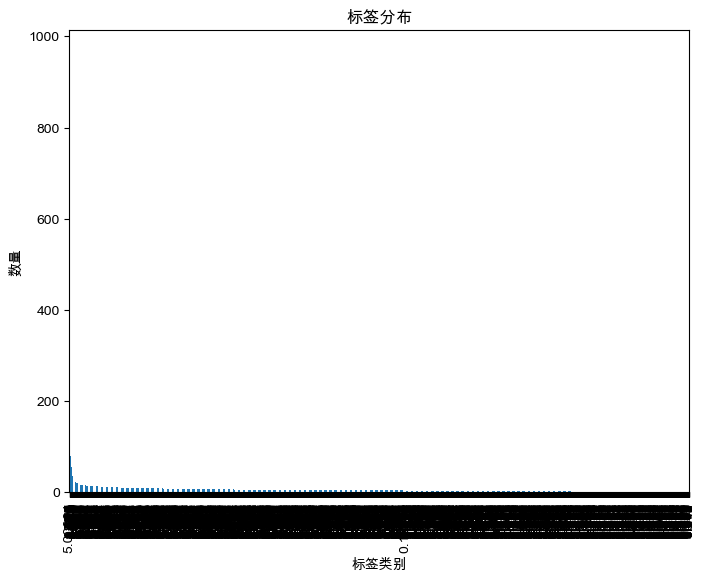

In [95]:
# 统计各个标签的数量
print("标签数量统计:")
# 由于y是numpy数组，需要先转换为pandas Series才能使用value_counts()
print(pd.Series(y).value_counts())

# 使用柱状图可视化标签分布
plt.figure(figsize=(8, 6))
pd.Series(y).value_counts().plot(kind='bar')
plt.title('标签分布')
plt.xlabel('标签类别')
plt.ylabel('数量')
plt.show()



In [97]:
# 导入KNN分类器
from sklearn.neighbors import KNeighborsClassifier
# 导入评估指标
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# 记录开始时间
import time
start_time = time.time()

# 创建KNN分类器,k=5
knn = KNeighborsClassifier(n_neighbors=5)

# 训练模型
# 将连续值转换为离散类别
y_train = (y_train > y_train.mean()).astype(int)
knn.fit(X_train, y_train)

# 记录结束时间
end_time = time.time()
print(f"模型训练用时: {end_time - start_time:.4f}秒")


模型训练用时: 0.0072秒


In [102]:
# 在验证集上进行预测
# 确保在此之前已经定义并训练了模型
from sklearn.linear_model import LogisticRegression  # 导入逻辑回归模型
model = LogisticRegression()  # 创建模型实例
model.fit(X_train_scaled, y_train)  # 训练模型
val_pred = model.predict(X_test_scaled) # 预测

# 计算验证集准确率
# 将连续值转换为二分类标签
y_test_binary = (y_test > 0.5).astype(int)
val_pred_binary = (val_pred > 0.5).astype(int)
val_accuracy = accuracy_score(y_test_binary, val_pred_binary)
print(f"验证集准确率: {val_accuracy:.4f}")


验证集准确率: 0.3895


In [112]:
# 导入必要的库
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 定义KNN分类器
knn = KNeighborsClassifier()

# 定义参数网格
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # 近邻数
    'weights': ['uniform', 'distance'],  # 权重选项
    'metric': ['euclidean', 'manhattan']  # 距离度量
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,  # 5折交叉验证
    scoring='accuracy',  # 评分标准
    n_jobs=-1  # 使用所有CPU核心
)

# 在训练数据上进行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和得分
print("最佳参数:", grid_search.best_params_)
print("最佳得分:", grid_search.best_score_)
best_params = grid_search.best_params_
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)
# 使用最佳参数的模型进行预测

y_pred_best = best_knn.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test_binary, y_pred_best)
print(f"最佳模型在验证集上的准确率: {best_accuracy:.4f}")

最佳参数: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
最佳得分: 0.6971897507781135
最佳模型在验证集上的准确率: 0.3912
